Anzahl der Features: 5 und Anzahl der Zielvariablen: 1
RMSE: Train = 53.89800482253167, Test = 56.227454230581316


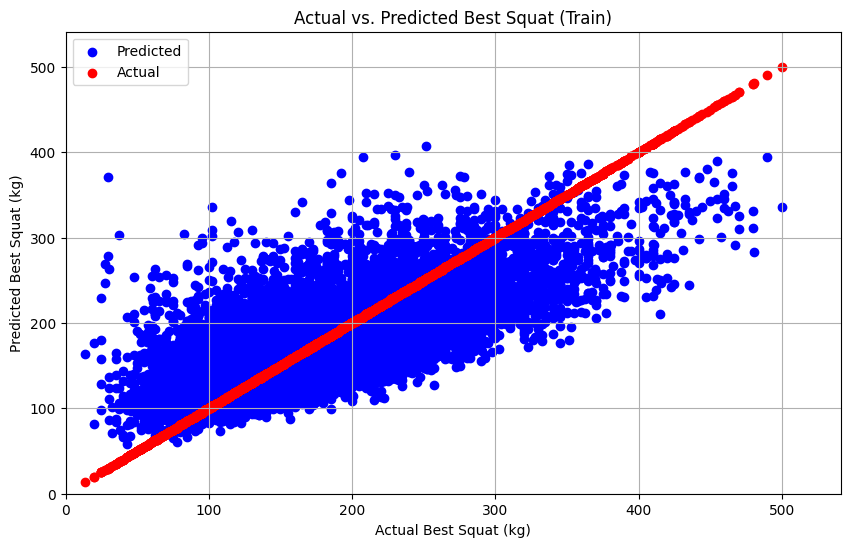

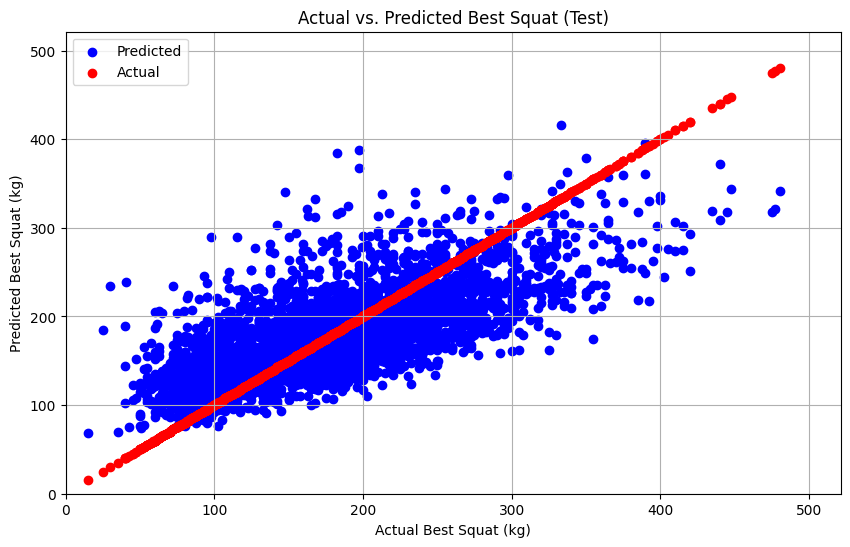

In [1]:
####################################################################
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Laden der Daten aus der CSV-Datei
df = pd.read_csv("Data.csv")

# Funktion zur Bereinigung der numerischen Werte
def clean_numeric(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

# Bereinigung der Zielvariablen
df['BestSquatKg'] = df['BestSquatKg'].apply(clean_numeric)
df['BestDeadliftKg'] = df['BestDeadliftKg'].apply(clean_numeric)

# Entfernen von Zeilen mit NaN-Werten
df.dropna(inplace=True)

# Daten vorbereiten
df = pd.get_dummies(df, columns=['Equipment'], drop_first=True)

X = df.drop(['playerId', 'Name', 'BestSquatKg', 'BestDeadliftKg', 'Sex'], axis=1)
y = df['BestSquatKg']

# Aufteilung der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Anzahl der Features und Zielvariablen
num_X = X_train_scaled.shape[1]
num_y = y_train_scaled.shape[1]
print("Anzahl der Features: {0} und Anzahl der Zielvariablen: {1}".format(num_X, num_y))

# Trainieren des Regressionsmodells
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train_scaled)

# Vorhersage auf den Trainingsdaten
y_train_pred = reg_model.predict(X_train_scaled)

# Vorhersage auf den Testdaten
y_test_pred = reg_model.predict(X_test_scaled)

# Umkehrung der Skalierung für die Vorhersagen
y_train_pred_rescaled = scaler_y.inverse_transform(y_train_pred)
y_test_pred_rescaled = scaler_y.inverse_transform(y_test_pred)

# Berechnung der RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rescaled))
print("RMSE: Train = {0}, Test = {1}".format(rmse_train, rmse_test))

# Visualisierung der Vorhersagen auf den Trainingsdaten
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rescaled, color='blue', label='Predicted')
plt.scatter(y_train, y_train, color='red', label='Actual')  # Punkte für "Actual" hinzugefügt
plt.xlabel('Actual Best Squat (kg)')
plt.ylabel('Predicted Best Squat (kg)')
plt.title('Actual vs. Predicted Best Squat (Train)')
plt.legend()
plt.grid(True)
plt.xlim(0, None)  # Nur positiver Bereich für x-Achse
plt.ylim(0, None)  # Nur positiver Bereich für y-Achse
plt.show()

# Visualisierung der Vorhersagen auf den Testdaten
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rescaled, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')  # Punkte für "Actual" hinzugefügt
plt.xlabel('Actual Best Squat (kg)')
plt.ylabel('Predicted Best Squat (kg)')
plt.title('Actual vs. Predicted Best Squat (Test)')
plt.legend()
plt.grid(True)
plt.xlim(0, None)  # Nur positiver Bereich für x-Achse
plt.ylim(0, None)  # Nur positiver Bereich für y-Achse
plt.show()
